### TEXT PREPROCESSING

In [1]:
import nltk, re, string
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer 
from ast import literal_eval

txt = open('dataset.txt')
raw = txt.read()
print(raw)

def preprocess_word(w):
    # Removes punctuation
    translator = str.maketrans('', '', string.punctuation)
    punctuation = w.translate(translator)

    return punctuation


def preprocessing(x):
    # Returns a nested list of the processed sentences
    
    mentions = re.sub(r'@\w+',"", x) #removes mentions
    numbers = re.sub('[0-9]+', "", mentions) #removes numbers
    links = re.sub(r'http\S+', "", numbers) #removes links
    
    sentence_tokenized = sent_tokenize(links) #sentence tokenization - INACCURATE!!!
    
    lower = [[sent.lower()] for sent in sentence_tokenized] #lower text
     
    in_list = [word for sent in lower for word in sent]

    word_tokenized = [word_tokenize(sent) for sent in in_list]
    word_tokenized = [sent for sent in word_tokenized if sent] #word tokenization
    
    for _id, sent in enumerate(word_tokenized):
        word_tokenized[_id] =  [preprocess_word(w) for w in sent]
    
    words = [[word for word in sent if word != '' and word != 'rt'] for sent in word_tokenized] #removes useless words
    sentences = [sent for sent in words if sent] #removes empty sentences
    
    
    return sentences


text = preprocessing(raw)
print(text)


    
#lemmatization
#quotes = punctuation.replace("'","").replace("\"","")

#df = pd.DataFrame(text)
#writer = pd.ExcelWriter('test.xlsx', engine='xlsxwriter')
#df.to_excel(writer, sheet_name='welcome', index=False)
#writer.save()

14800,6,0,6,0,1,"RT @BoyGoten: When Waka said, ""Suck My Dragon Balls bitch call me GOKU!"" http://t.co/N7kP7dS198"
14801,3,0,3,0,1,RT @Br33zyF: Jackie a Old bamma ass bitch
14802,3,0,3,0,1,RT @Braceface_Tay: Tell them bitches I'll always be your Mrs.&#128141;
14803,3,0,0,3,2,RT @BradThor We now know more about Twinkies and how old the earth is than what happened in #Benghazi.
14804,3,0,3,0,1,"RT @Brandan420_: ""You smell like Weed..."" and bitch you smell like sober."
14805,3,0,1,2,2,RT @Brandee876: ghetto sour cream http://t.co/1meyQQ7B6G
14806,3,0,3,0,1,RT @BrandonBangerz: &#8220;@mostafa092: &amp; you guys thought sharkiesha and shovel girl were crazy.. she snapped this bitches nose. https://t.co/5&#8230;
14807,3,0,3,0,1,"RT @BrandonOnDrums: ""She still a bitch"" RT @Mryungone: Lol so what do you tweet if you lose?"
14808,3,0,0,3,2,"RT @BrandonTierney: Crooked number followed by shut down frame, love it. #Yankees"
14809,3,0,0,3,2,RT @BrandonTierney: Grinding! #Yankees
14810,3,0,3,0

[['when', 'waka', 'said', 'suck', 'my', 'dragon', 'balls', 'bitch', 'call', 'me', 'goku'], ['jackie', 'a', 'old', 'bamma', 'ass', 'bitch', 'tell', 'them', 'bitches', 'i', 'll', 'always', 'be', 'your', 'mrs', 'we', 'now', 'know', 'more', 'about', 'twinkies', 'and', 'how', 'old', 'the', 'earth', 'is', 'than', 'what', 'happened', 'in', 'benghazi'], ['you', 'smell', 'like', 'weed', 'and', 'bitch', 'you', 'smell', 'like', 'sober'], ['ghetto', 'sour', 'cream', 'amp', 'you', 'guys', 'thought', 'sharkiesha', 'and', 'shovel', 'girl', 'were', 'crazy', 'she', 'snapped', 'this', 'bitches', 'nose'], ['she', 'still', 'a', 'bitch', 'lol', 'so', 'what', 'do', 'you', 'tweet', 'if', 'you', 'lose'], ['crooked', 'number', 'followed', 'by', 'shut', 'down', 'frame', 'love', 'it'], ['yankees', 'grinding'], ['yankees', 'who', 'else', 'remembers', 'these', 'bitches', 'but', 'thats', 'your', 'baby', 'mom', 'though'], ['that', 'ai', 'nt', 'my', 'hoe'], ['graphic', 'gt', 'christians', 'massacred', 'by', 'jihadi',

### BAG OF WORDS 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from ast import literal_eval

try:
    assert(literal_eval(str(text)) == text.copy())
except AssertionError:
    print('failed to convert')
    
final_str = [" ".join(x) for x in text]

train, test = train_test_split(final_str, test_size=0.2)

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train)
print(train_counts)

  (0, 9)	1
  (0, 332)	1
  (0, 253)	1
  (0, 549)	1
  (1, 549)	1
  (1, 191)	1
  (1, 426)	1
  (1, 114)	1
  (1, 14)	1
  (1, 208)	1
  (1, 467)	1
  (1, 397)	1
  (1, 16)	1
  (1, 402)	1
  (1, 192)	1
  (1, 517)	1
  (1, 113)	1
  (1, 398)	1
  (1, 415)	1
  (1, 464)	1
  (1, 59)	1
  (1, 328)	1
  (2, 396)	1
  (3, 549)	2
  (3, 16)	1
  :	:
  (69, 11)	1
  (69, 246)	1
  (69, 214)	1
  (69, 58)	1
  (69, 364)	1
  (69, 474)	2
  (69, 241)	1
  (69, 452)	1
  (69, 270)	1
  (69, 400)	1
  (69, 267)	1
  (69, 416)	1
  (69, 27)	1
  (69, 518)	1
  (69, 197)	1
  (69, 69)	1
  (69, 139)	1
  (69, 418)	1
  (69, 345)	1
  (69, 307)	1
  (69, 178)	1
  (69, 325)	1
  (69, 424)	1
  (69, 7)	1
  (69, 312)	1


### EMBEDDINGS 

In [3]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=text, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

vector = model.wv['bitch'] #returns numpy vector of a word

sims = model.wv.most_similar('bitch', topn=10) #returns similar words

print(vector)
print(sims)

C:\Users\Angelina\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[-0.00033006  0.00412034 -0.00637748 -0.00108633  0.00808004  0.00550413
 -0.0033289   0.0052606  -0.00933838  0.00569977 -0.00505109 -0.00491673
  0.00967709  0.00126268  0.00814321 -0.00747959  0.00533901  0.00915538
 -0.00846522 -0.00766984 -0.00641647 -0.00452268 -0.00318813 -0.00892738
  0.00748299 -0.00439461  0.0072578   0.00452938 -0.00759392  0.0044348
  0.00714006 -0.0068316  -0.00704088 -0.00326512 -0.00901999 -0.00027814
 -0.0003996   0.00176433  0.00050615 -0.00279449 -0.00527808  0.00048832
 -0.00162697  0.00701367  0.00450274  0.00380142  0.00051672 -0.00321756
 -0.00344543 -0.00084463  0.00239132 -0.00392083 -0.00690248 -0.00836724
 -0.01005054 -0.00552369 -0.00141851 -0.00378274 -0.00791048 -0.00288327
  0.00436454 -0.00346418  0.00854174  0.00106408 -0.0088149   0.01047826
  0.00873794  0.00686759 -0.00858786  0.00732067  0.00285875  0.00553864
  0.00523595  0.00183312 -0.00200754  0.00936729  0.00973051  0.00410665
 -0.00375451  0.00016205  0.00023108 -0.00897098 -0.

In [ ]:
from sklearn.decomposition import IncrementalPCA  
from sklearn.manifold import TSNE                 
import numpy as np                                  


def reduce_dimensions(model):
    num_dimensions = 2 


    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key) 

    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(autosize=True)
    plt.scatter(x_vals, y_vals)

    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

### DEPENDENCIES

#### 1. Dependency Parsing

In [4]:
def flatten_list(x):
#Takes a nested list and converts it into a list of elements
#where every sublist is a new element

    new_list = [] 
    
    for sent in text:
        sentences = " ".join(sent)
        new_list.append(sentences)
    
    return new_list

new = flatten_list(text)

In [9]:
def dependency_parsing(x):
# Returns a nested list of syntactic labels

    nlp = spacy.load("en_core_web_sm")
    dependencies = []
    for sent in x:
        doc = nlp(sent)
        new_list = [token.dep_ for token in doc]
        dependencies.append(new_list)
        
    return dependencies

dep = dependency_parsing(new)
print(dep)


[['advmod', 'nsubj', 'ROOT', 'xcomp', 'poss', 'compound', 'dobj', 'ccomp', 'ccomp', 'dobj', 'oprd'], ['npadvmod', 'det', 'amod', 'compound', 'compound', 'nsubj', 'ROOT', 'dative', 'dobj', 'nsubj', 'aux', 'advmod', 'ccomp', 'poss', 'attr', 'nsubj', 'advmod', 'parataxis', 'dobj', 'prep', 'pobj', 'cc', 'advmod', 'acomp', 'det', 'nsubj', 'conj', 'prep', 'nsubj', 'pcomp', 'prep', 'pobj'], ['nsubj', 'ROOT', 'prep', 'pobj', 'cc', 'conj', 'nsubj', 'parataxis', 'prep', 'pobj'], ['amod', 'amod', 'nsubj', 'ROOT', 'nmod', 'nsubj', 'ccomp', 'nmod', 'cc', 'conj', 'nsubj', 'ccomp', 'acomp', 'nsubj', 'ccomp', 'det', 'compound', 'dobj'], ['nsubj', 'advmod', 'det', 'compound', 'ROOT', 'advmod', 'dobj', 'aux', 'nsubj', 'advcl', 'mark', 'nsubj', 'advcl'], ['amod', 'ROOT', 'acl', 'agent', 'amod', 'prt', 'compound', 'pobj', 'appos'], ['ROOT', 'acl'], ['ROOT', 'nsubj', 'advmod', 'relcl', 'det', 'dobj', 'cc', 'nsubj', 'conj', 'poss', 'attr', 'attr', 'advmod'], ['nsubj', 'ROOT', 'advmod', 'poss', 'attr'], ['co

#### 2. Graphs

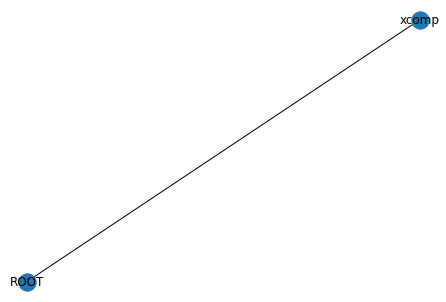

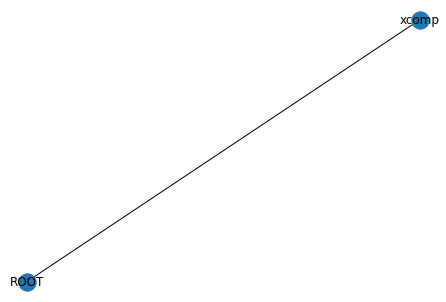

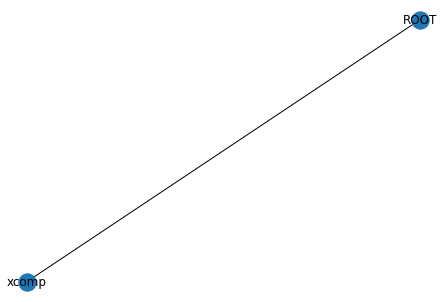

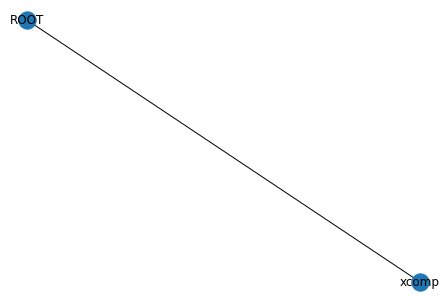

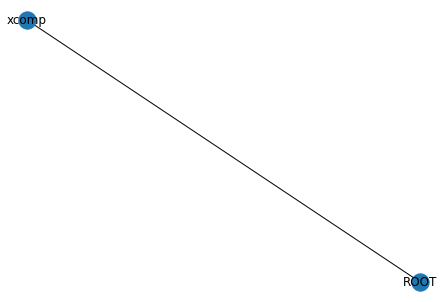

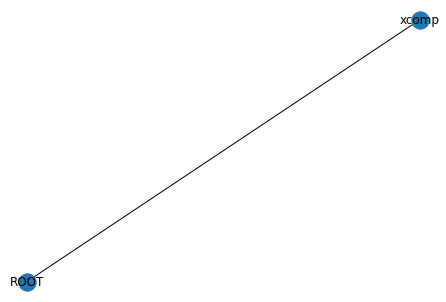

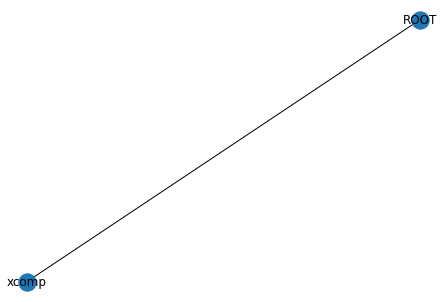

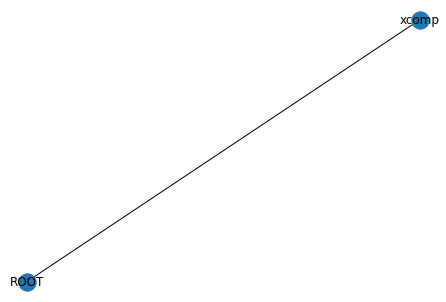

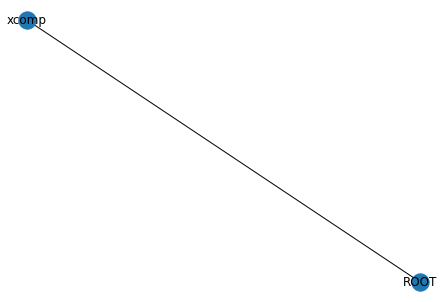

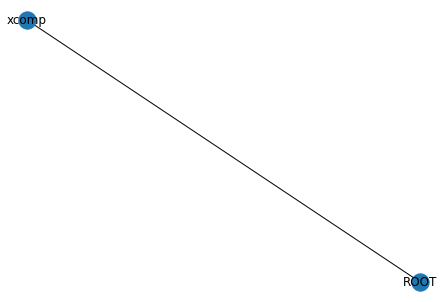

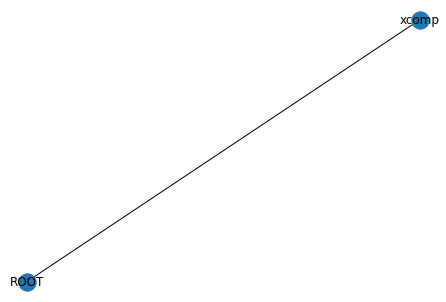

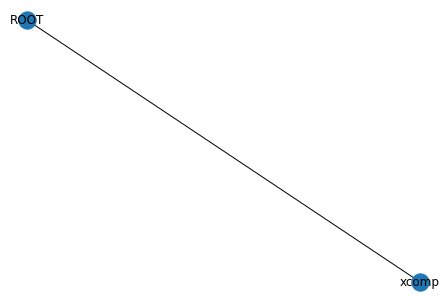

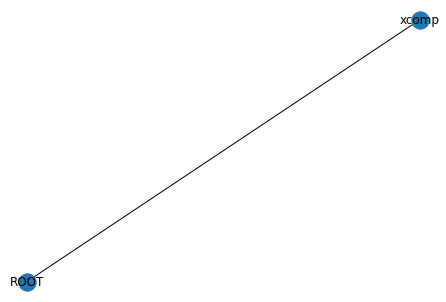

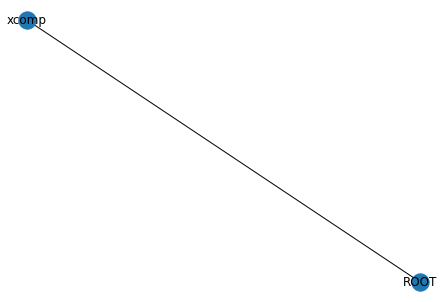

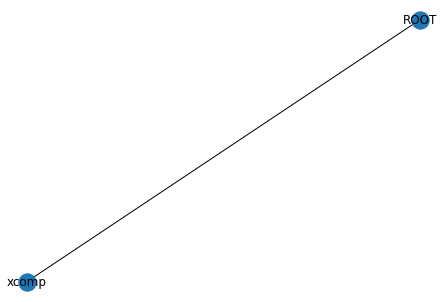

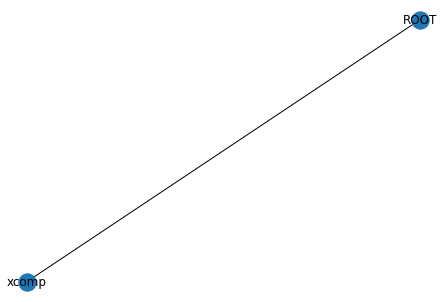

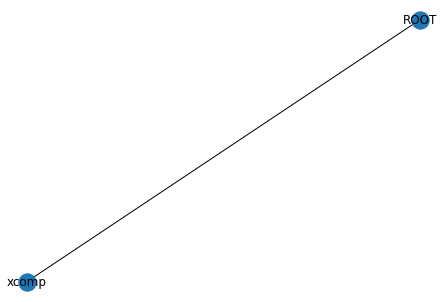

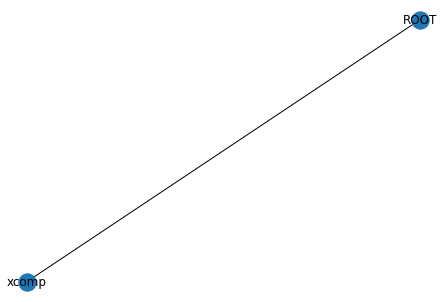

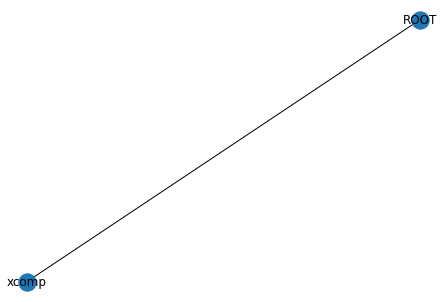

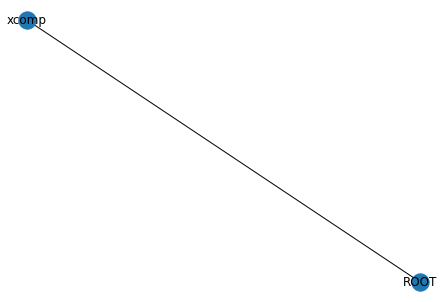

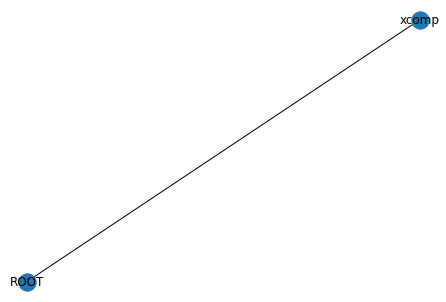

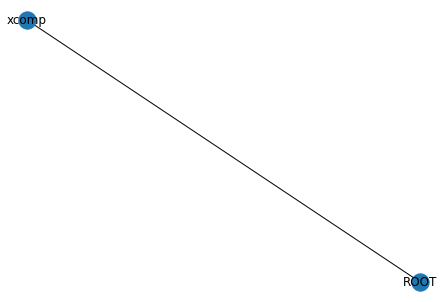

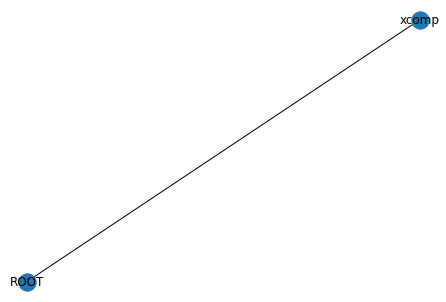

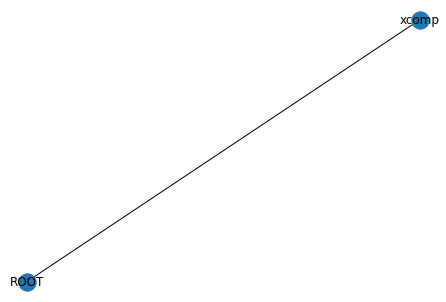

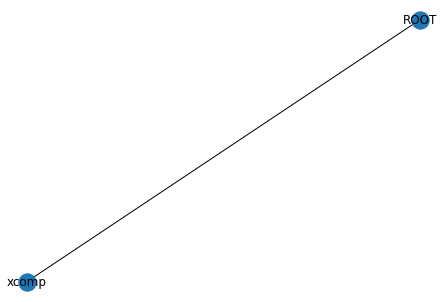

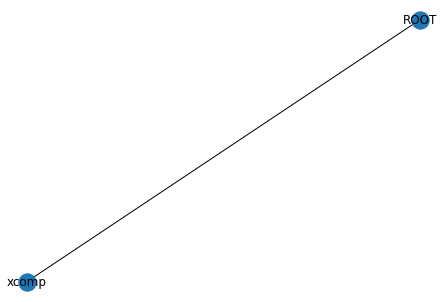

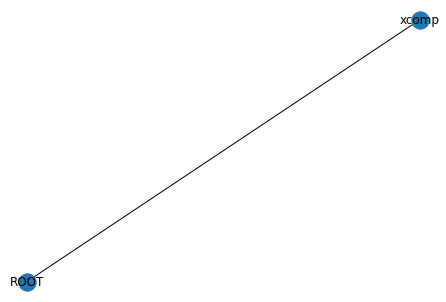

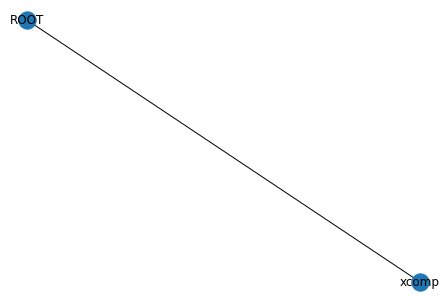

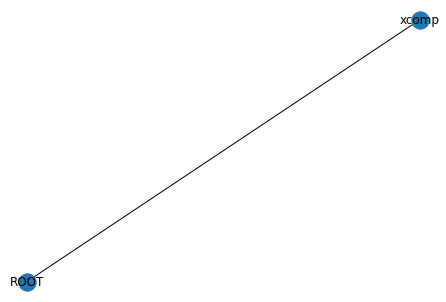

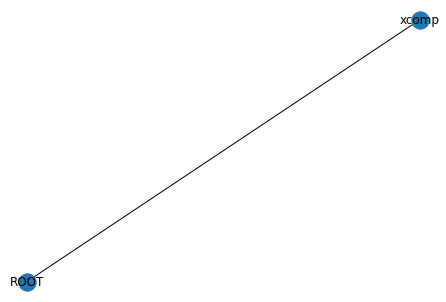

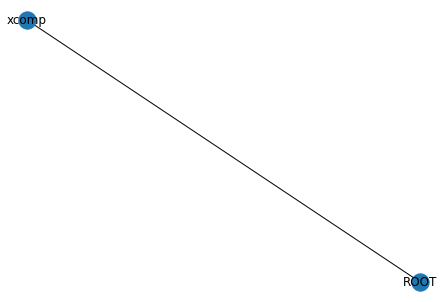

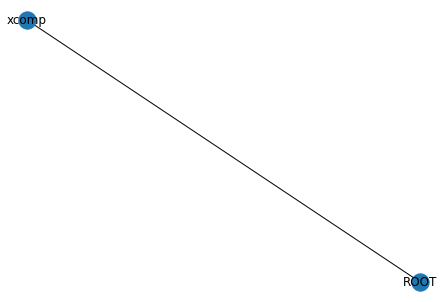

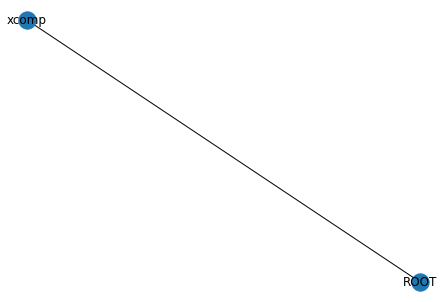

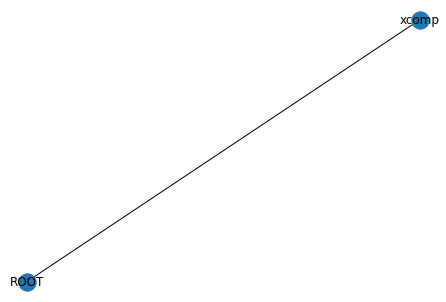

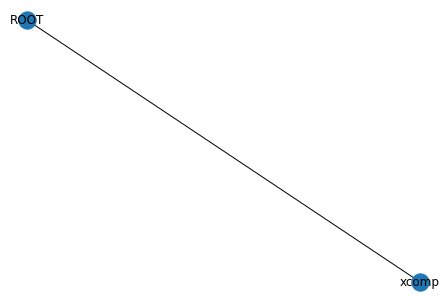

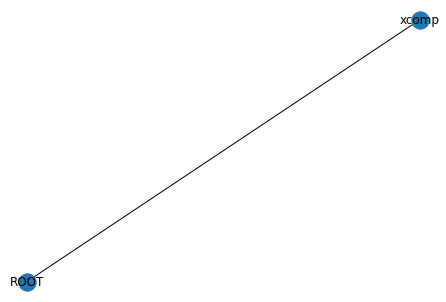

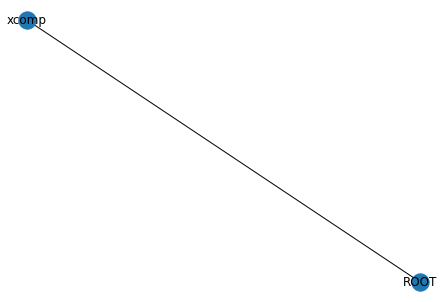

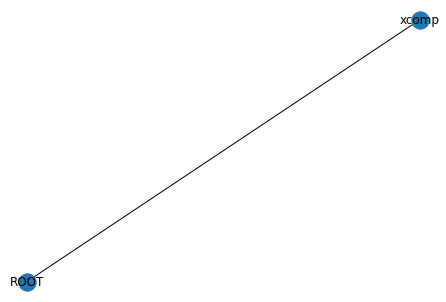

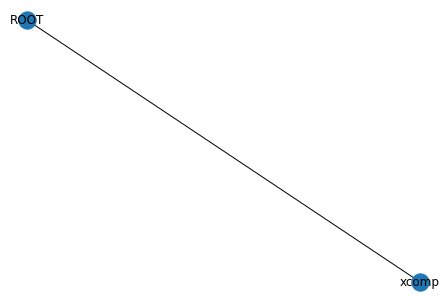

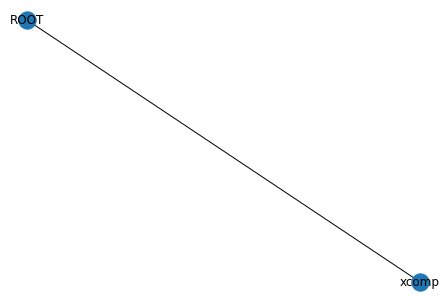

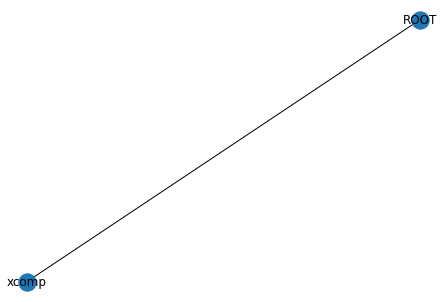

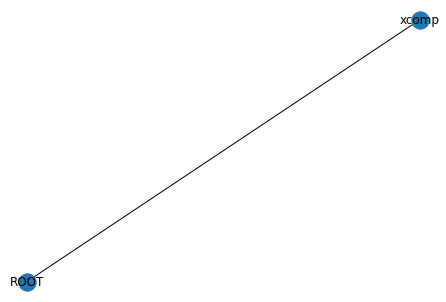

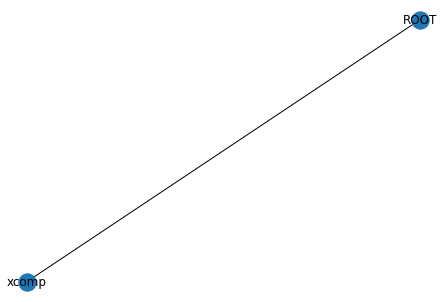

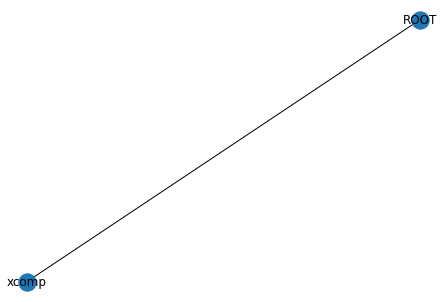

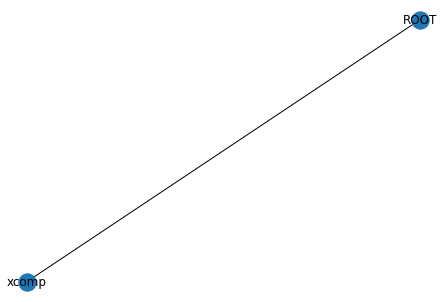

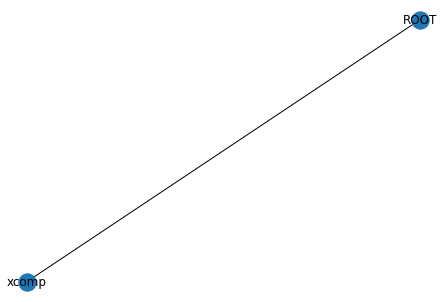

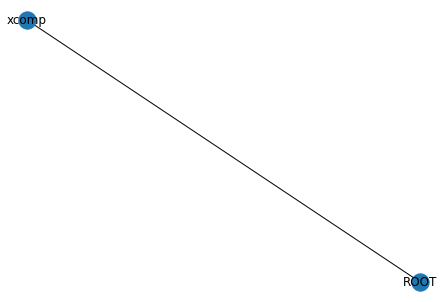

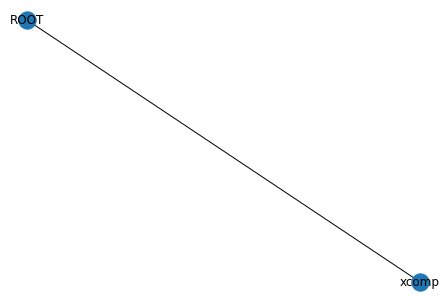

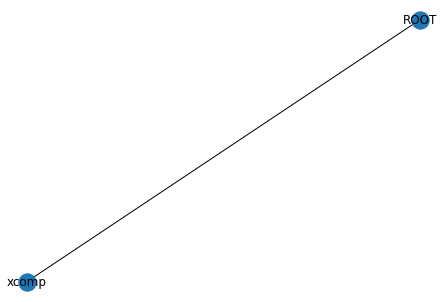

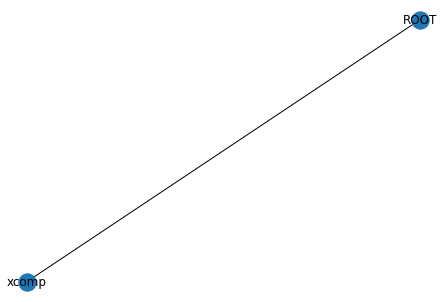

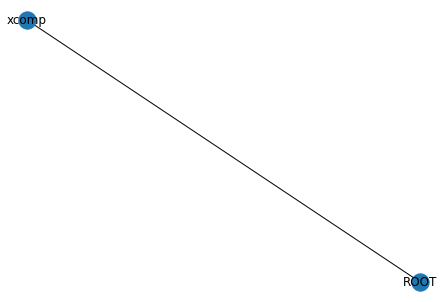

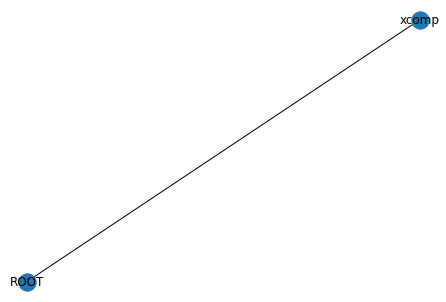

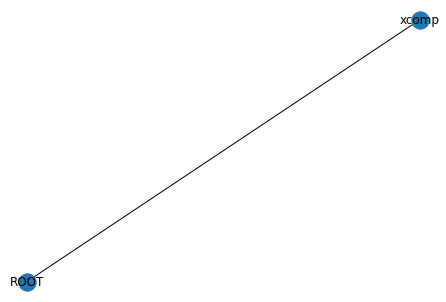

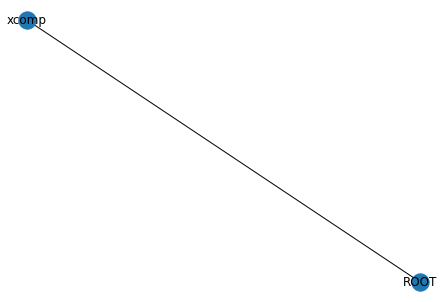

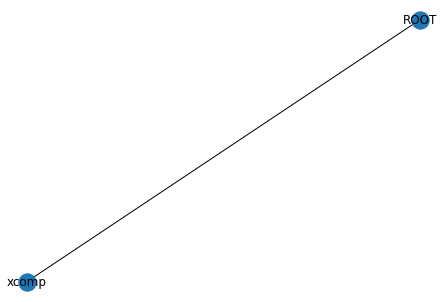

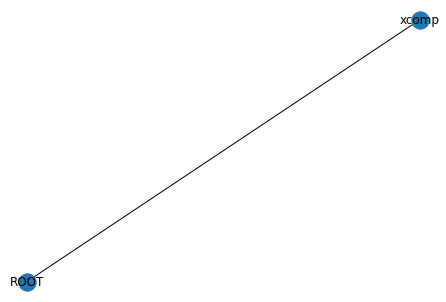

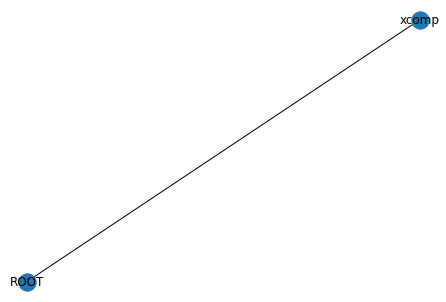

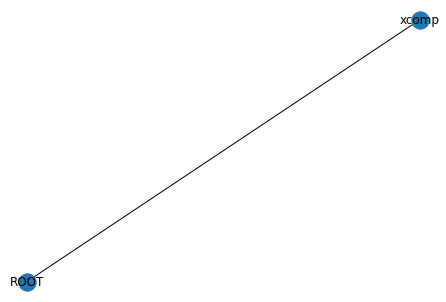

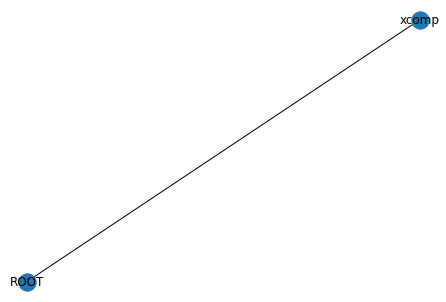

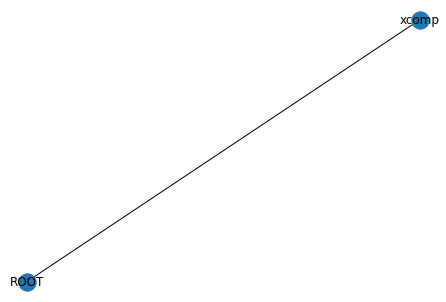

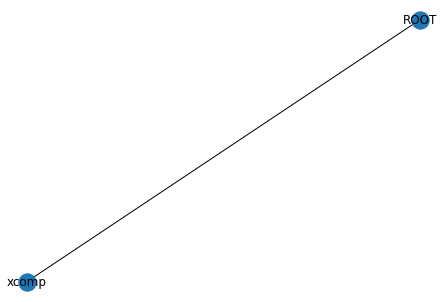

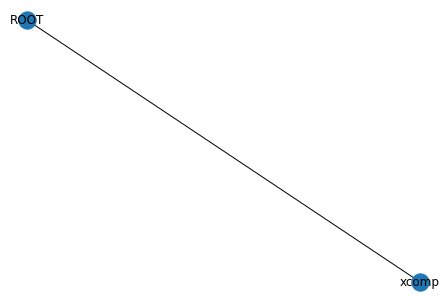

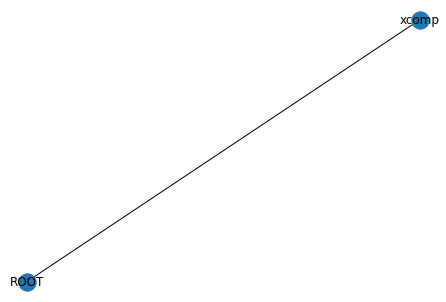

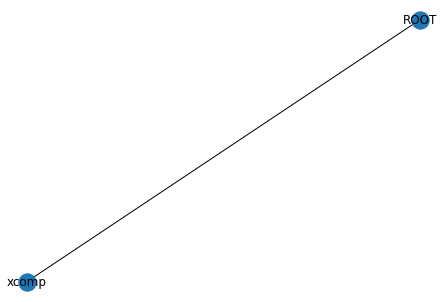

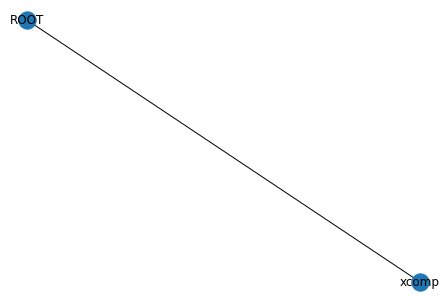

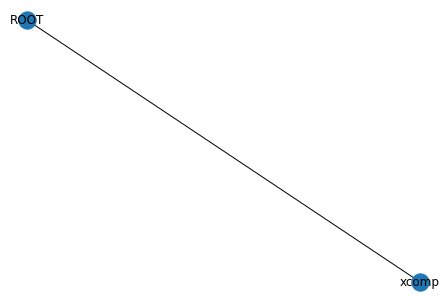

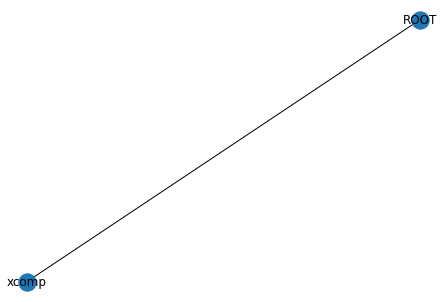

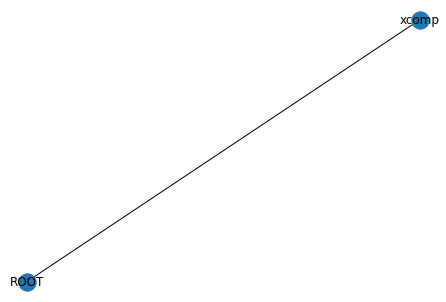

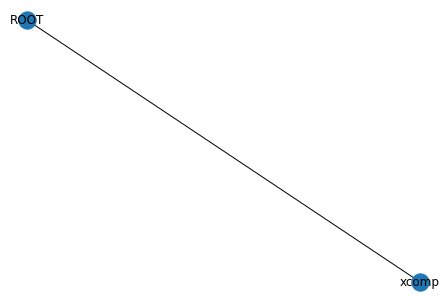

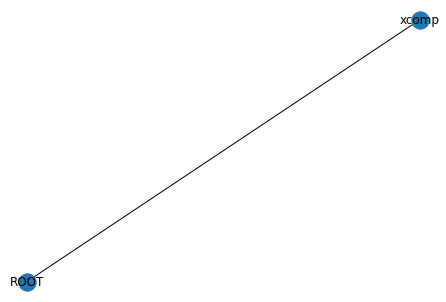

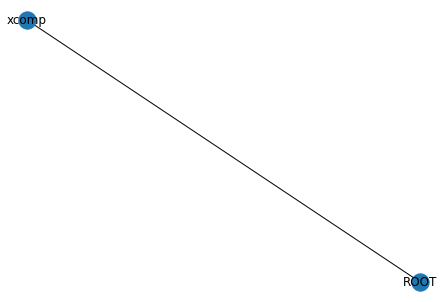

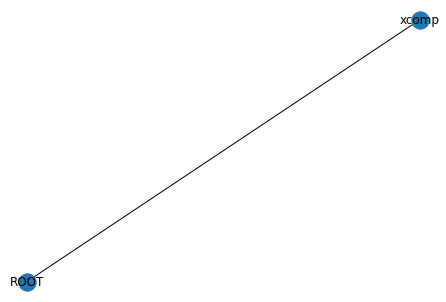

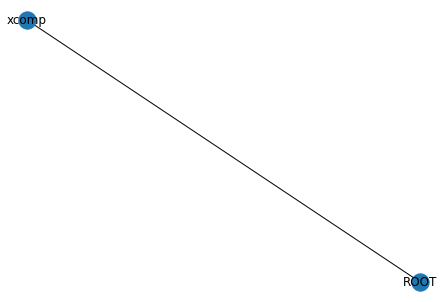

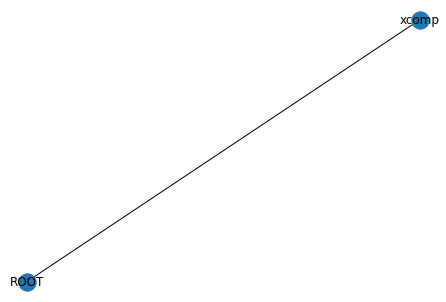

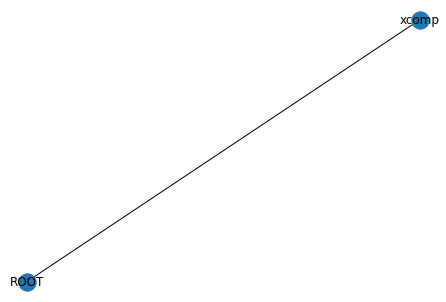

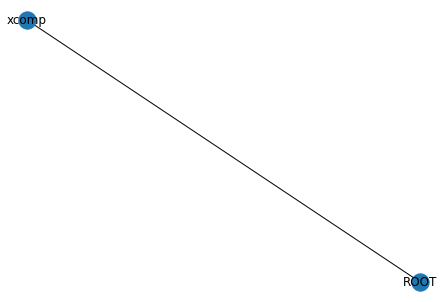

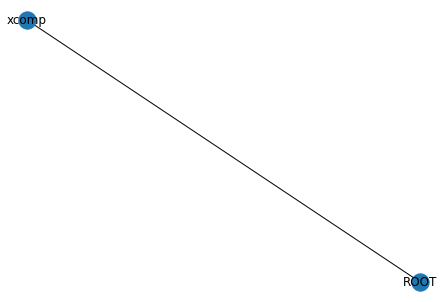

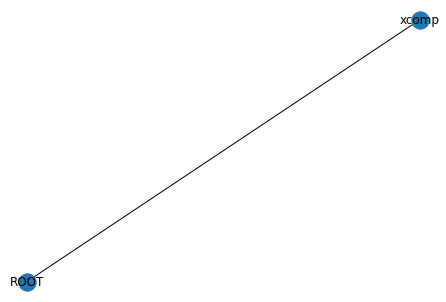

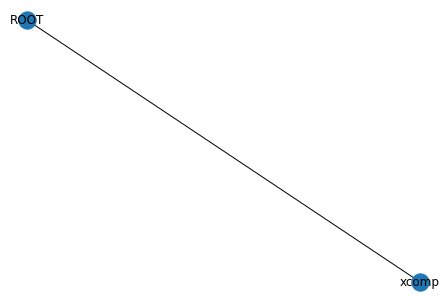

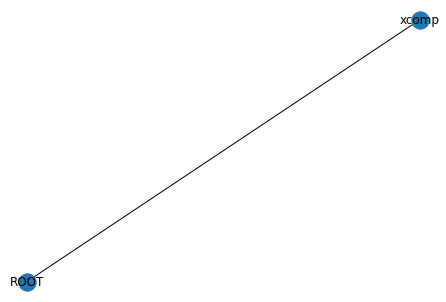

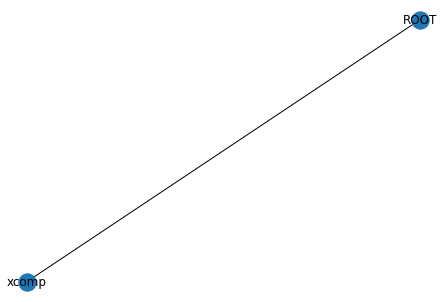

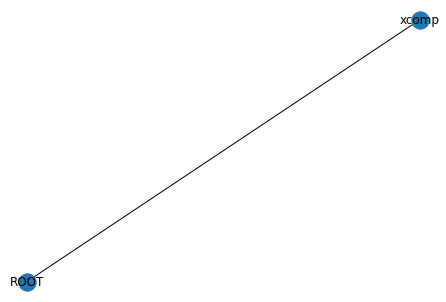

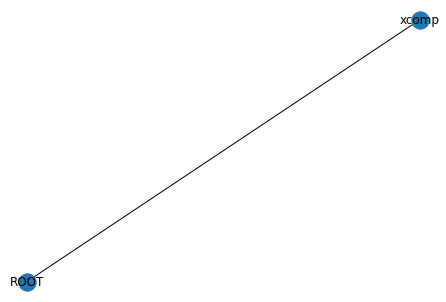

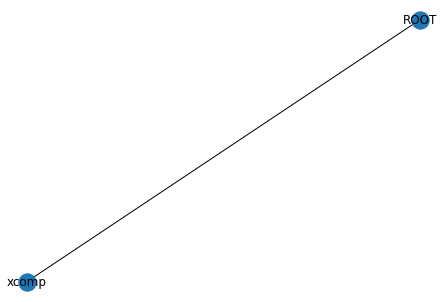

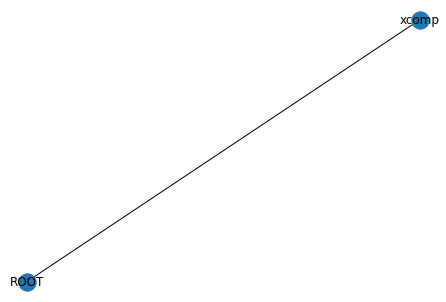

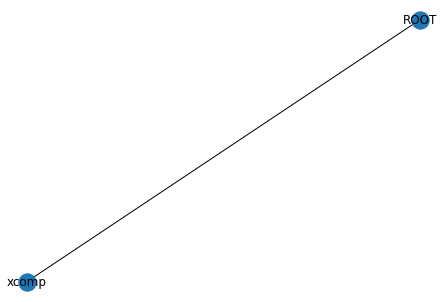

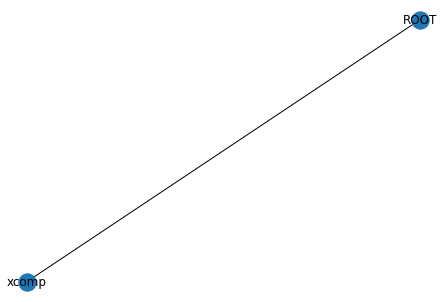

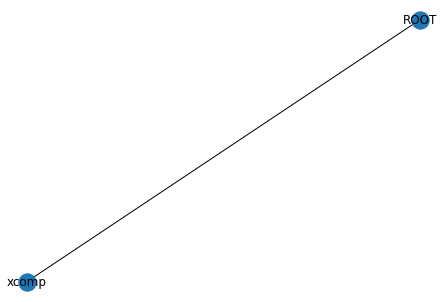

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
G=nx.Graph()

for sent in dep:
    for word in sent:
        if word == 'ROOT':
            G.add_edge('ROOT', 'xcomp')
        elif word == 
            G.add_edge()
        elif word ==
            G.add_edge()
        elif word ==
            G.add_edge()
        elif word ==
            G.add_edge()
        elif word ==
            G.add_edge()
        
    nx.draw(G, with_labels=True)
    plt.show()

#### 3. Adjacency Matrices

In [ ]:
# A class to represent the adjacency list of the node
class AdjNode:
    def __init__(self, data):
        self.vertex = data
        self.next = None


# A class to represent a graph. A graph
# is the list of the adjacency lists.
# Size of the array will be the no. of the
# vertices "V"
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [None] * self.V

    # Function to add an edge in an undirected graph
    def add_edge(self, src, dest):
        # Adding the node to the source node
        node = AdjNode(dest)
        node.next = self.graph[src]
        self.graph[src] = node

        # Adding the source node to the destination as
        # it is the undirected graph
        node = AdjNode(src)
        node.next = self.graph[dest]
        self.graph[dest] = node

    # Function to print the graph
    def print_graph(self):
        for i in range(self.V):
            print("Adjacency list of vertex {}\n head".format(i), end="")
            temp = self.graph[i]
            while temp:
                print(" -> {}".format(temp.vertex), end="")
                temp = temp.next
            print(" \n")


# Driver program to the above graph class
if __name__ == "__main__":
    V = 5
    graph = Graph(V)
    graph.add_edge(0, 1)
    graph.add_edge(0, 4)
    graph.add_edge(1, 2)
    graph.add_edge(1, 3)
    graph.add_edge(1, 4)
    graph.add_edge(2, 3)
    graph.add_edge(3, 4)

    graph.print_graph()